In [31]:
!unzip /content/Fuzzy_dataset.csv.zip


Archive:  /content/Fuzzy_dataset.csv.zip
  inflating: Fuzzy_dataset.csv       
  inflating: __MACOSX/._Fuzzy_dataset.csv  


In [32]:
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-geometric

In [ ]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 3, 4],
                           [1, 0, 1, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t().contiguous())

print(data['x'])

tensor([[-1.],
        [ 0.],
        [ 1.]])


In [33]:
import numpy as np

attackFreeArray = []
file = open('/content/Fuzzy_dataset.csv', 'r')
attackList = []
counter = 0
graphList = []
ultimateGraphList = [] 
uttimateDetectionList = []
graphCounter = 0

noOfMessages = 200
for line in file:
  Xpartition = line.split()[0].split(',')
  attackList.append(Xpartition[len(Xpartition)-1])

  
  node = Xpartition[1]

  graphList.append(node)
  if len(graphList) == noOfMessages: #No of messages
    ultimateGraphList.append(graphList)
    uttimateDetectionList.append(attackList)

  
    graphCounter+=1    
    graphList = []
    attackList = []
  

ugl = ultimateGraphList
udl = uttimateDetectionList



print(len(graphList))
print(len(ugl))
print(ugl[3])
print(len(udl))
print(udl[0])



60
19194
['0260', '02a0', '0329', '0545', '02b0', '0430', '04b1', '01f1', '0153', '0002', '00a0', '00a1', '02c0', '0350', '0130', '0131', '0140', '0370', '043f', '0440', '0690', '0316', '018f', '0260', '02a0', '0329', '0545', '02b0', '0002', '0153', '0130', '0131', '0140', '0350', '02c0', '0370', '043f', '0440', '04f0', '0316', '018f', '0260', '02a0', '0329', '0545', '02b0', '0430', '04b1', '01f1', '0153', '0002', '0350', '0370', '02c0', '043f', '0130', '0131', '0140', '0440', '0316', '018f', '0260', '02a0', '0329', '0545', '05f0', '02b0', '0002', '0153', '0130', '0131', '0140', '02c0', '0350', '0370', '043f', '0440', '04f0', '0316', '018f', '0260', '02a0', '0329', '0545', '02b0', '0430', '04b1', '01f1', '0153', '0002', '0350', '0370', '02c0', '043f', '0130', '0131', '0140', '0440', '0316', '018f', '0260', '02a0', '0329', '0545', '02b0', '0002', '0153', '0130', '0131', '0140', '02c0', '0350', '0370', '043f', '0440', '04f0', '0316', '018f', '0260', '02a0', '0329', '0545', '02b0', '0430'

In [34]:
#Making graph from the 200 sequential of id and store them in a file as Graph adjacent list
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import random
import torch
from scipy.sparse import csr_matrix
from torch_geometric.data import Data, DataLoader
gAttackfree=nx.DiGraph()
gAttacked = nx.DiGraph()

lenugl = len(ugl)

counter = 0
gAttackfreeCounter = 0
gAttackedCounter = 0



allLabelList = []
nodeFeatureList = []
uvList = []
DataList = []
for i in range(0,lenugl):
  uList = []
  vList = []
  attackFree = 0
  fList = []
  all_unique_nodes = list(set(ugl[i]))
  ln = len(all_unique_nodes)
  array = np.zeros((ln,ln))
  for j in range (0, len(ugl[i])-1):
     u = all_unique_nodes.index(ugl[i][j])
     v = all_unique_nodes.index(ugl[i][j+1])
     uList.append(u)
     vList.append(v)
     array[u][v] = array[u][v]+1
  uvList.append([uList,vList])
  edge_index =  torch.LongTensor([uList,vList])
  
  for k in range(len(array)):
    indeg = 0
    outdeg = 0
    for l in range(len(array[k])):
      outdeg = outdeg + array[k][l]
      indeg = indeg + array[l][k]
    fList.append([indeg,outdeg])
  
  nodeFeatureList.append(fList)
  x = torch.FloatTensor(fList)


  for j in range (0,len(ugl[i])):
    if udl[i][j] == 'T': 
      attackFree = 1
      break

  y = attackFree
  
  allLabelList.append(attackFree)

  DataList.append(Data(x = x,edge_index=edge_index,y=y))




print(uvList[0])
print(allLabelList.count(0))
print(allLabelList.count(1))

print(nodeFeatureList[3])


  









[[14, 19, 11, 0, 4, 5, 21, 6, 12, 22, 8, 24, 1, 2, 10, 18, 3, 15, 14, 19, 16, 17, 7, 0, 11, 23, 13, 6, 12, 4, 5, 21, 22, 8, 24, 20, 2, 10, 18, 3, 15, 14, 19, 11, 0, 4, 5, 21, 6, 12, 22, 8, 24, 1, 2, 10, 18, 3, 15, 14, 19, 16, 17, 7, 0, 11, 6, 22, 8, 12, 4, 5, 21, 24, 2, 10, 18, 3, 15, 14, 9, 19, 11, 0, 4, 5, 21, 6, 12, 22, 8, 24, 1, 2, 10, 18, 3, 15, 14, 19, 16, 17, 7, 0, 11, 6, 22, 8, 4, 5, 21, 12, 24, 2, 10, 18, 3, 15, 14, 19, 11, 0, 4, 5, 21, 6, 12, 22, 8, 24, 1, 2, 10, 18, 3, 15, 14, 19, 16, 17, 7, 0, 11, 6, 22, 8, 12, 4, 5, 21, 24, 2, 10, 18, 3, 15, 14, 19, 11, 0, 4, 5, 21, 6, 12, 22, 8, 24, 1, 2, 10, 18, 3, 15, 14, 9, 19, 16, 17, 7, 0, 11, 6, 22, 8, 12, 4, 5, 21, 24, 2, 10, 18, 3, 15, 14, 19, 11, 0], [19, 11, 0, 4, 5, 21, 6, 12, 22, 8, 24, 1, 2, 10, 18, 3, 15, 14, 19, 16, 17, 7, 0, 11, 23, 13, 6, 12, 4, 5, 21, 22, 8, 24, 20, 2, 10, 18, 3, 15, 14, 19, 11, 0, 4, 5, 21, 6, 12, 22, 8, 24, 1, 2, 10, 18, 3, 15, 14, 19, 16, 17, 7, 0, 11, 6, 22, 8, 12, 4, 5, 21, 24, 2, 10, 18, 3, 15, 14,

In [35]:
import random 


torch.manual_seed(12345)
random.shuffle(DataList)

dataset = DataList


train_size = int(lenugl*.70)

#print(int(train_size))


train_dataset = dataset[:train_size]
test_dataset = dataset[train_size:lenugl]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 13435
Number of test graphs: 5759


In [36]:
from torch_geometric.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=128, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 64
Batch(batch=[2983], edge_index=[2, 12736], x=[2983, 2], y=[64])

Step 2:
Number of graphs in the current batch: 64
Batch(batch=[3240], edge_index=[2, 12736], x=[3240, 2], y=[64])

Step 3:
Number of graphs in the current batch: 64
Batch(batch=[3206], edge_index=[2, 12736], x=[3206, 2], y=[64])

Step 4:
Number of graphs in the current batch: 64
Batch(batch=[3027], edge_index=[2, 12736], x=[3027, 2], y=[64])

Step 5:
Number of graphs in the current batch: 64
Batch(batch=[3263], edge_index=[2, 12736], x=[3263, 2], y=[64])

Step 6:
Number of graphs in the current batch: 64
Batch(batch=[3340], edge_index=[2, 12736], x=[3340, 2], y=[64])

Step 7:
Number of graphs in the current batch: 64
Batch(batch=[3452], edge_index=[2, 12736], x=[3452, 2], y=[64])

Step 8:
Number of graphs in the current batch: 64
Batch(batch=[3319], edge_index=[2, 12736], x=[3319, 2], y=[64])

Step 9:
Number of graphs in the current batch: 64
Batch(batch=[2806], edge_index

In [37]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(2, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, 2)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        
        return x

model = GCN(hidden_channels=64)
print(model)

GCN(
  (conv1): GCNConv(2, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


In [38]:
from IPython.display import Javascript
from sklearn.metrics import confusion_matrix
import numpy as np

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()
yTrue = []
yPred = []

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)  
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.


kkkk = 11
for epoch in range(1, kkkk):
    train()
    train_acc = test(train_loader)
    
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}')






<IPython.core.display.Javascript object>

Epoch: 001, Train Acc: 0.9978
Epoch: 002, Train Acc: 0.9967
Epoch: 003, Train Acc: 0.9975
Epoch: 004, Train Acc: 0.9975
Epoch: 005, Train Acc: 0.9964
Epoch: 006, Train Acc: 0.9972
Epoch: 007, Train Acc: 0.9972
Epoch: 008, Train Acc: 0.9978
Epoch: 009, Train Acc: 0.9977
Epoch: 010, Train Acc: 0.9976


In [39]:
from sklearn.metrics import confusion_matrix

def conf(yTrue,yPred):
  tp,tn,fp,fn = 0,0,0,0
  for i in range(len(yTrue)):
    if yTrue[i] == yPred[i] and yTrue[i] == 1:
      tn= tn+1

    elif yTrue[i] == yPred[i] and yTrue[i] == 0:
      tp = tp+1
    elif yTrue[i] == 0 and yPred[i] == 1:
      fp=fp+1
    else:
      fn=fn+1
  

  return np.array([[tp,fp],[fn,tn]])
    




def test1(loader):
     model.eval()

     correct = 0
     cf = np.array([[0,0],[0,0]])
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)  
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct +=(data.y).sum()  # Check against ground-truth labels.
         c=conf(np.array(data.y),np.array(pred))
         print(c)

         cf = cf+c
     print(correct)
      

     return cf  # Derive ratio of correct predictions.

print('isafhksfh')
cf = test1(test_loader)  


cf = cf.T
print(cf)
print((cf[0][0]+cf[1][1])/(cf[0][0]+cf[0][1]+cf[1][0]+cf[1][1]))

isafhksfh
[[74  0]
 [ 0 54]]
[[80  0]
 [ 1 47]]
[[90  0]
 [ 0 38]]
[[85  0]
 [ 1 42]]
[[96  0]
 [ 0 32]]
[[76  0]
 [ 0 52]]
[[82  0]
 [ 0 46]]
[[90  0]
 [ 0 38]]
[[86  0]
 [ 0 42]]
[[90  0]
 [ 0 38]]
[[75  0]
 [ 1 52]]
[[88  0]
 [ 0 40]]
[[85  0]
 [ 1 42]]
[[76  0]
 [ 1 51]]
[[85  0]
 [ 0 43]]
[[86  0]
 [ 0 42]]
[[75  0]
 [ 0 53]]
[[69  0]
 [ 1 58]]
[[88  0]
 [ 0 40]]
[[84  0]
 [ 0 44]]
[[83  0]
 [ 1 44]]
[[86  0]
 [ 0 42]]
[[77  0]
 [ 0 51]]
[[85  0]
 [ 0 43]]
[[79  0]
 [ 0 49]]
[[77  0]
 [ 0 51]]
[[87  0]
 [ 0 41]]
[[87  0]
 [ 0 41]]
[[81  0]
 [ 0 47]]
[[87  0]
 [ 0 41]]
[[82  0]
 [ 1 45]]
[[87  0]
 [ 0 41]]
[[79  0]
 [ 0 49]]
[[81  0]
 [ 1 46]]
[[84  0]
 [ 0 44]]
[[82  0]
 [ 0 46]]
[[89  0]
 [ 0 39]]
[[91  0]
 [ 2 35]]
[[82  0]
 [ 1 45]]
[[82  0]
 [ 1 45]]
[[85  0]
 [ 0 43]]
[[92  0]
 [ 0 36]]
[[74  0]
 [ 1 53]]
[[91  0]
 [ 0 37]]
[[78  0]
 [ 0 49]]
tensor(2011)
[[3748   14]
 [   0 1997]]
0.9975690223997222


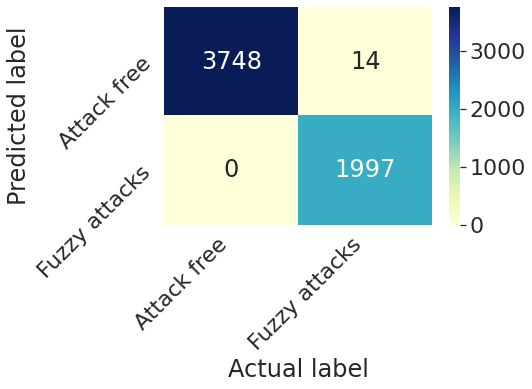

In [43]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



cm = cf


cm_matrix = pd.DataFrame(data=cm, columns=["Attack free","Fuzzy attacks"], 
                                 index=["Attack free","Fuzzy attacks"])
sns.set(font_scale=2.0)
sns.heatmap(cm_matrix, annot=True, fmt= 'g', cmap='YlGnBu')
plt.rcParams['font.size'] = 3
plt.rcParams['figure.figsize'] = (3, 3)  
# plt.title("Confusion Matrix for All attack")
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.yticks(rotation = 45)
plt.xticks(rotation = 45, ha = 'right')
 
plt.savefig('confusion_fuzzy.pdf', bbox_inches = "tight")
# plt.savefig('confusion_fuzzy.svg', bbox_inches = "tight")
# plt.savefig('confusion_fuzzy.png', bbox_inches = "tight")

In [ ]:
import math

import torch
import numpy as np


import time
import argparse
import numpy as np

import torch
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import confusion_matrix

from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
import torch.nn as nn
import torch.nn.functional as F


class GraphConvolution(Module):

    def __init__(self, in_features, out_features, bias=True):
        super(GraphConvolution, self).__init__()
        
        # print(in_features)
        # print(out_features)
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.DoubleTensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.DoubleTensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
    
    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input, adj):
        support = torch.matmul(input, self.weight)
        output = torch.matmul(adj, support)
        if self.bias is not None:
            return output + self.bias
        else:
            return output

    def __repr__(self):
        return self.__class__.__name__ + ' (' \
               + str(self.in_features) + ' -> ' \
               + str(self.out_features) + ')'

class GCN(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj):
        x = F.relu(self.gc1(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        #print(F.log_softmax(x, dim=1))
        return F.log_softmax(x, dim=1)


seed = 42
epochs = 200
lr = 0.01
weight_decay = 5e-4
hidden = 16
dropout =0.5
np.random.seed(seed)




adj, features, labels = aList, nList, lList

#adj, features, labels = aList[, nList, lList

f = int(lenugl*.7)
g = int(lenugl*.15)
h = int(lenugl*.15)

print(f)
print(g)
print(h)

idx_train = torch.LongTensor(range(f))
idx_test = torch.LongTensor(range(f,f+g))
idx_val = torch.LongTensor(range(f+g,f+g+h))

# Model and optimizer
print(features.shape)
model = GCN(nfeat=features.shape[1],
            nhid=hidden,
            nclass=labels.max().item() + 1,
            dropout=dropout)
#print(model)
optimizer = optim.Adam(model.parameters(),
                       lr=lr, weight_decay=weight_decay)


fastmode = False


def accuracy(output, labels, t = 0):
    preds = output.max(1)[1].type_as(labels)
    if t == 1:

      print(np.array(confusion_matrix(list(labels),list(preds))).T)
    correct = preds.eq(labels).double()
    correct = correct.sum()
    return correct / len(labels)

def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    #print(features.shape)
    output = model(features, adj)
    # print(output.shape)
    # print(output[idx_train].shape)
    # print(labels[idx_train].shape)
    loss_train = F.nll_loss(output[idx_train], labels[idx_train])
    acc_train = accuracy(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    if not fastmode:
        # Evaluate validation set performance separately,
        # deactivates dropout during validation run.
        model.eval()
        #print(features.shape)
        #print(model)
        output = model(features, adj)

    loss_val = F.nll_loss(output[idx_val], labels[idx_val])
    acc_val = accuracy(output[idx_val], labels[idx_val])
    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(loss_train.item()),
          'acc_train: {:.4f}'.format(acc_train.item()),
          'loss_val: {:.4f}'.format(loss_val.item()),
          'acc_val: {:.4f}'.format(acc_val.item()),
          'time: {:.4f}s'.format(time.time() - t))


def test(t=0):
    model.eval()
    output = model(features, adj)
    loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    
    acc_test= accuracy(output[idx_test], labels[idx_test],t)
    
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test.item()))
    


# Train model
t_total = time.time()
for epoch in range(epochs):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
t_total = time.time()
test(1)
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))










12829
2749
2749
torch.Size([18328, 11])
Epoch: 0001 loss_train: 7.6337 acc_train: 0.4098 loss_val: 6.3732 acc_val: 0.0000 time: 3.1980s
Epoch: 0002 loss_train: 6.1403 acc_train: 0.4537 loss_val: 3.6720 acc_val: 0.0004 time: 3.2029s
Epoch: 0003 loss_train: 5.2571 acc_train: 0.4728 loss_val: 1.6822 acc_val: 0.0266 time: 3.2154s
Epoch: 0004 loss_train: 4.3784 acc_train: 0.4959 loss_val: 0.7081 acc_val: 0.6257 time: 3.2163s
Epoch: 0005 loss_train: 3.7808 acc_train: 0.5108 loss_val: 0.3234 acc_val: 0.9251 time: 3.2138s
Epoch: 0006 loss_train: 3.1041 acc_train: 0.5385 loss_val: 0.1696 acc_val: 0.9825 time: 3.2134s
Epoch: 0007 loss_train: 2.4855 acc_train: 0.5926 loss_val: 0.0965 acc_val: 0.9956 time: 3.2264s
Epoch: 0008 loss_train: 1.9026 acc_train: 0.6389 loss_val: 0.0577 acc_val: 0.9996 time: 3.2210s
Epoch: 0009 loss_train: 1.5366 acc_train: 0.6977 loss_val: 0.0386 acc_val: 1.0000 time: 3.2166s
Epoch: 0010 loss_train: 1.2613 acc_train: 0.7397 loss_val: 0.0468 acc_val: 1.0000 time: 3.2610s


In [ ]:
# cm = [[1612 ,  10],
#  [   5  ,793]]


tp = cm[0][0]
tn = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]

re = tp/(tp+fn)
pr = tp/(tp+fp)
f1 = 2*pr*re/(pr+re)
fpr = fp / (fp+tn)
print("pr.........."+str(pr))
print("re----"+str(re))

print("f1===="+str(f1))
print("fpr====="+ str(fpr))
print((tp+tn)/(tp+tn+fp+fn))

pr..........0.98989898989899
re----0.9932432432432432
f1====0.9915682967959528
fpr=====0.009708737864077669
0.9917355371900827


In [ ]:
71002
170939
0.991287131986724
[[170760   1929]
 [   179  69073]]
 5

35791
85180
0.9906010531449686
[[84065    22]
 [ 1115 35769]]
 10


3659
8438
0.9962800694387038
[[8424   31]
 [  14 3628]]
100


1832
4217
0.993387336749876
[[4197   20]
 [  20 1812]]

803
1617
0.993801652892562
[[1612   10]
 [   5  793]]
 500



 464
746
0.9917355371900827
[[743   7]
 [  3 457]]
 1000



 309
296
0.9917355371900827
[[294   3]
 [  2 306]]
 2k

 175
67
1.0
[[ 67   0]
 [  0 175]]
 5k


 88
33
1.0
[[33  0]
 [ 0 88]]
 10k

In [ ]:
cm =[ [[170760 ,  1929],
 [179 , 69073]],

 [[84065   , 22],
 [ 1115, 35769]],

[[8424 ,  31],
 [  14, 3628]],

 [[4197 ,  20],
 [  20 ,1812]],

 [[1612  , 10],
 [   5  ,793]],

[[743 ,  7],
 [  3 ,457]],


 [[ 67 ,  0],
 [  0 ,175]],

 [[33,  0],
 [ 0, 88]]
]

for i in range(len(cm)):

  tp = cm[i][0][0]
  tn = cm[i][1][1]
  fp = cm[i][0][1]
  fn = cm[i][1][0]

  re = tp/(tp+fn)
  pr = tp/(tp+fp)
  f1 = 2*pr*re/(pr+re)
  fpr = fp / (fp+tn)


  mcc = (tp*tn-fp*fn)/((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**.5

  fdr = fp/(fp+tp)

  # print("pr.........."+str(pr))
  # print("re----"+str(re))

  # print("f1===="+str(f1))
  # print("fpr====="+ str(fpr))
  print("mcccccc--------->" +str(mcc))
  #print("fdr======="+str(fdr))
  # print((tp+tn)/(tp+tn+fp+fn))

mcccccc--------->0.9789880325873227
mcccccc--------->0.9778659028555149
mcccccc--------->0.991178167512607
mcccccc--------->0.9843402613459972
mcccccc--------->0.9860106010676708
mcccccc--------->0.9825172905181248
mcccccc--------->1.0
mcccccc--------->1.0


In [ ]:
import pandas as pd

square_node_data = pd.DataFrame(
    {"x": [1, 2, 3, 4], "y": [-0.2, 0.3, 0.0, -0.5]}, index=["a", "b", "c", "d"]
)
square_node_data

,x,y
a,1,-0.2
b,2,0.3
c,3,0.0
d,4,-0.5


      Nodes  Edges  ...  MaximumPagerank  MininumPagerank
No.                 ...                                  
1        27    112  ...         0.215139         0.011104
2        25     75  ...         0.359649         0.018228
3        25     88  ...         0.285778         0.015716
4        27     97  ...         0.276848         0.014271
5        27    137  ...         0.173902         0.013195
...     ...    ...  ...              ...              ...
1828     26     70  ...         0.077329         0.013768
1829     26     73  ...         0.073358         0.011842
1830     26     78  ...         0.067820         0.011954
1831     26     85  ...         0.071132         0.009662
1832     26     76  ...         0.086512         0.008505

[1832 rows x 9 columns]
StellarGraph: Undirected multigraph
 Nodes: 1832, Edges: 0

 Node types:
  default: [1832]
    Features: float32 vector, length 9
    Edge types: none

 Edge types:
